### Assignment-1

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("C:/Users/Radhika Biraje/Desktop/USdataset/US_Accidents_March23.csv")

In [9]:
df.shape
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


1. How many unique values are there in categorical columns like `City`, `State`, and `Weather_Condition`? Which category is the most frequent in each?

In [11]:
print("Unique Cities:", df['City'].nunique())
print("Unique States:", df['State'].nunique())
print("Unique Weather Conditions:", df['Weather_Condition'].nunique())

print("Most frequent City:", df['City'].value_counts().idxmax())
print("Most frequent State:", df['State'].value_counts().idxmax())
print("Most frequent Weather Condition:", df['Weather_Condition'].value_counts().idxmax())

Unique Cities: 13678
Unique States: 49
Unique Weather Conditions: 144
Most frequent City: Miami
Most frequent State: CA
Most frequent Weather Condition: Fair


2. Calculate the percentage of missing values in each column and list columns with more than 5% missing data.

In [12]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_columns = missing_percentage[missing_percentage > 5]

print("Columns with more than 5% missing data:\n", missing_columns)

Columns with more than 5% missing data:
 End_Lat              44.029355
End_Lng              44.029355
Wind_Chill(F)        25.865904
Wind_Speed(mph)       7.391355
Precipitation(in)    28.512858
dtype: float64


3. Convert `Start_Time` and `End_Time` columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.

In [15]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

df = df.dropna(subset=['Start_Time'])

print("Earliest accident:", df['Start_Time'].min())
print("Latest accident:", df['Start_Time'].max())

Earliest accident: 2016-01-14 20:18:33
Latest accident: 2023-03-31 23:30:00


4. Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?

In [16]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

df = df.drop_duplicates()

Number of duplicate rows: 0


5. Explore the distribution of accident severity (Severity column). What percentage of accidents belong to each severity level? Visualize this distribution with a pie chart.

Severity
2    77.790990
3    18.600066
4     2.644567
1     0.964378
Name: proportion, dtype: float64


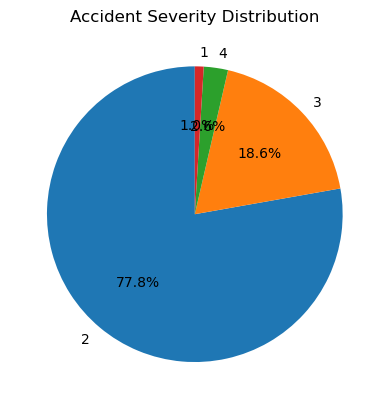

In [17]:
severity_counts = df['Severity'].value_counts(normalize=True) * 100
print(severity_counts)

# Pie Chart
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Accident Severity Distribution")
plt.show()